In [1]:
# Import all required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
plt.style.use(["science", "ieee"])
from gic.model.oml import OceanModel
from gic.model.cables import Cable, TheoriticalSolver
from gic.model.utils import RecursiveNamespace, frexp102str
from gic.validation.simulate_synB_synT import SytheticCableAnalysis

from scipy.stats import pearsonr
%matplotlib inline

In [2]:
# Input Control JSON for Qubec Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],
            "Phim": [ 10, 20, 30, 40, 50, 60 ],
            "T_hours": 72
        },
        "tapering": 0.1
    },
    "cable": {
        "cable_sections": [
            {
                "sec_id": None,
                "len_km": 1000,
                "elec_params": {
                    "earth_model": "FT1",
                    "ocean_depth": 0,
                    "ocean_resistivity": 0.3
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",
    "opname": "Synthetic-B"
}
control = RecursiveNamespace(**ICJ)
resp = []
for d in [10, 100, 1000, 10000]:
    control.cable.cable_sections[0].elec_params.ocean_depth = d
    sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
    sca.run()
    resp.append(sca.cable.cable_sections[0].cs_oml)

2022-07-06 17:31:52.656 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-07-06 17:31:52.657 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-07-06 17:31:52.733 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-06 17:31:52.736 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B FT1->OM(FT1)
2022-07-06 17:31:53.139 | INFO     | gic.validation.simulate_synB_synT:check_analytical_numerical:224 - Corr(Eanl,Enum): 0.9999999961
2022-07-06 17:32:01.101 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-07-06 17:32:01.102 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-07-06 17:32:01.157 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-06 17:32:01.161 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B FT1->OM(FT1)
2022

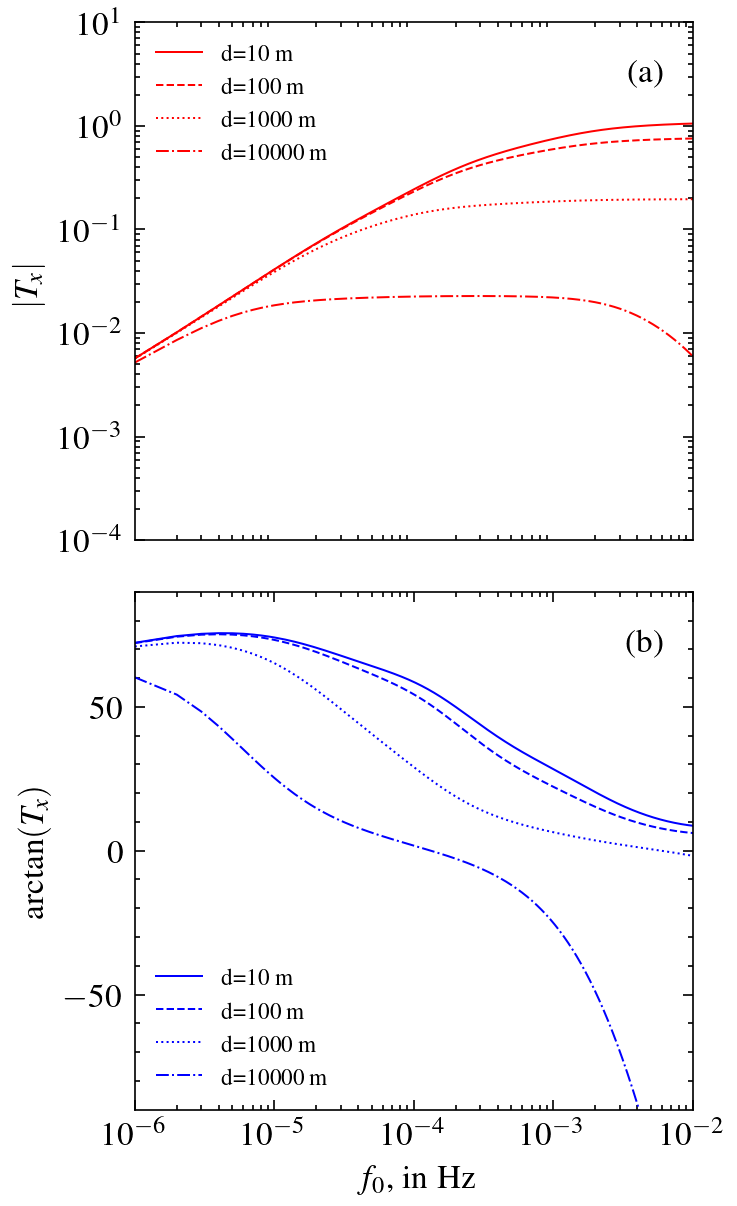

In [3]:
fig = plt.figure(dpi=240, figsize=(3,6))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for i, d in enumerate([10, 100, 1000, 10000]):
    Tx = resp[i].get_TFs()
    ax0.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6, label=r"d=%d m"%d)
    ax1.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6, label=r"d=%d m"%d)
ax0.text(0.95, 0.9, "(a)", ha="right", va="center", transform=ax0.transAxes)
ax0.set_ylabel(r"$|T_x|$")
ax0.set_xlim(1e-6, 1e-2)
ax0.set_ylim(1e-4, 1e1)
ax0.set_xticks([])
ax0.legend(loc=2, fontsize=7)
ax1.set_xlabel(r"$f_0$, in Hz")
ax1.set_ylabel(r"$\arctan(T_x)$")
ax1.set_xlim(1e-6, 1e-2)
ax1.set_ylim(-90, 90)
ax1.legend(loc=3, fontsize=7)
ax1.text(0.95, 0.9, "(b)", ha="right", va="center", transform=ax1.transAxes)
fig.subplots_adjust(hspace=0.1)